# Coding for Economists - Session 7

***

## 1. Setup Environment

In [4]:
%conda install imbalanced-learn -y

Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: \ 

## Package Plan ##

  environment location: /opt/anaconda3/envs/pyenv01

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.13.0    |  py312hca03da5_0         375 KB
    sklearn-compat-0.1.3       |  py312hca03da5_0          32 KB
    ------------------------------------------------------------
                                           Total:         407 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   pkgs/main/osx-arm64::imbalanced-learn-0.13.0-py312hca03da5_0 
  sklearn-compat     pkgs/main/osx-arm64::sklearn-compat-0.1.3-py312hca03da5_0 



imbalanced-learn-0.1 | 375 KB    |                                       |   0% 
sklearn-compat-0.1.3 | 32 KB     |                             

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Turn on copy on write
pd.options.mode.copy_on_write = False

## 2. Read Data

In [42]:
# We use the Titanic dataset hosted on GitHub as an example.
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(data_url)
print("Initial dataset shape:", df.shape)
df.head()

Initial dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- __PassengerId__: A unique identifier for each passenger.
- __Survived__: Survival status of the passenger (0 = Did not survive, 1 = Survived).
- __Pclass__: Ticket class (1 = First class, 2 = Second class, 3 = Third class).
- __Name__: The full name of the passenger.
- __Sex__: The gender of the passenger.
- __Age__: The age of the passenger.
- __SibSp__: Number of siblings and spouses aboard.
- __Parch__: Number of parents and children aboard.
- __Ticket__: Ticket number of the passenger.
- __Fare__: The amount of money paid for the ticket.
- __Cabin__: Cabin number where the passenger was accommodated.
- __Embarked__: Port of embarkation ('S' (Southampton), 'C' (Cherbourg), and 'Q' (Queenstown)).

In [49]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## 3. Clean Data

### 3.1 Handle Missing Data

In [43]:
# Identify columns with missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [44]:
# For demonstration purposes:
# - Fill missing 'Age' values with the median age.
df['Age'] = df['Age'].fillna(df['Age'].median())
# - Fill missing 'Embarked' values with the mode.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### 3.2 Remove Features

In [45]:
# Drop columns that may not be useful for modeling
# Here, we remove identifiers and columns with high missing values.
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
print("Missing values per column:\n", df.isnull().sum())
df.head()

Missing values per column:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 4. Preprocessing

### 4.1 Encode the Categorical Features

In [50]:
# We will encode 'Sex' and 'Embarked'. Pandas' get_dummies creates binary indicator columns.
df_encoded = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
df_encoded.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,False,True,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,False,False,False,True
4,0,35.0,0,0,8.0500,False,True,True,False,True


### 4.2 Scale the Numeric Features

In [51]:
# We'll scale the numeric features for better model performance.
# First, identify numeric columns (excluding the target column 'Survived')
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])
df_encoded.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,-0.565736,0.432793,-0.473674,-0.502445,False,True,True,False,True
1,1,0.663861,0.432793,-0.473674,0.786845,False,False,False,False,False
2,1,-0.258337,-0.474545,-0.473674,-0.488854,False,True,False,False,True
3,1,0.433312,0.432793,-0.473674,0.420730,False,False,False,False,True
4,0,0.433312,-0.474545,-0.473674,-0.486337,False,True,True,False,True


## 5 Prepare Train/Test Sets

### 5.1 Train/Test Split

In [52]:
# Split the data into features and target variable
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

In [53]:
# Split into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1234, stratify=y # stratify=y ensures distribution of y is preserved in both training and testing sets
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (712, 9)
Test set shape: (179, 9)


### 5.2 Re-balance the Training Set

In [58]:
# This step is useful if the classes in the target variable are imbalanced.
# Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1234)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Original training target distribution:\n", y_train.value_counts())
print("Resampled training target distribution:\n", pd.Series(y_train_res).value_counts())

Original training target distribution:
 Survived
0    439
1    273
Name: count, dtype: int64
Resampled training target distribution:
 Survived
0    439
1    439
Name: count, dtype: int64


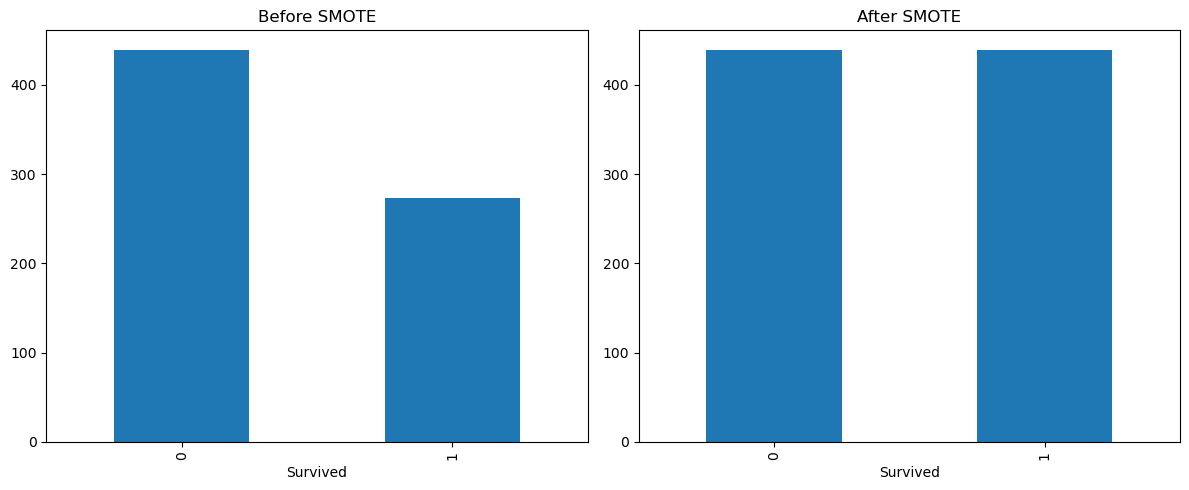

In [59]:
# Visualize the distribution of the target variable before and after re-balancing
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
y_train.value_counts().plot(kind='bar', ax=ax[0], title='Before SMOTE')
pd.Series(y_train_res).value_counts().plot(kind='bar', ax=ax[1], title='After SMOTE')
plt.tight_layout()
plt.show()

In [60]:
# Import required libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assume that X_train_res, y_train_res, X_test, and y_test are already defined from the previous processing steps

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the balanced training data
rf_classifier.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Random Forest Accuracy: 77.09%
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       110
           1       0.69      0.72      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset from UCI repository (adult income dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

data = pd.read_csv(url, header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split data into features and target
X = data.drop("income", axis=1)
y = data["income"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
